# Data Science Project - Zameen.com

## Real Estate Properties Analysis

In this project, we analyze a dataset of real estate properties to uncover insights, perform exploratory data analysis (EDA), visualize key aspects, and build machine learning models to predict property prices. The dataset contains various attributes such as price, type, location, number of bedrooms and bathrooms, area, and more.


### Imports

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# set visualization styles
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
%matplotlib inline

### Loading the dataset

In [6]:
# Load the dataset
df=pd.read_csv("properties.csv")

# Display initial info
print("Initial Dataset Info:")
df.info()

df.columns
df.head(8)

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10789 entries, 0 to 10788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   home_id           10789 non-null  int64  
 1   price             10789 non-null  object 
 2   type              10789 non-null  object 
 3   location          10789 non-null  object 
 4   location_precise  10789 non-null  object 
 5   baths             10789 non-null  object 
 6   area              10789 non-null  object 
 7   purpose           10789 non-null  object 
 8   beds              10789 non-null  object 
 9   creation_date     10789 non-null  object 
 10  latitude          10789 non-null  float64
 11  longitude         10789 non-null  float64
 12  description       10789 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


home_id        price   type                                     location  \
0        0     25 Crore  House                  DHA Defence, Lahore, Punjab   
1        1  11.25 Crore  House                  DHA Defence, Lahore, Punjab   
2        2  10.95 Crore  House                  EME Society, Lahore, Punjab   
3        3   6.87 Crore  House                  DHA Defence, Lahore, Punjab   
4        4   7.45 Crore  House                  DHA Defence, Lahore, Punjab   
5        5    6.5 Crore  House                  DHA Defence, Lahore, Punjab   
6        6    1.6 Crore  House  Central Park Housing Scheme, Lahore, Punjab   
7        7    6.5 Crore  House                  DHA Defence, Lahore, Punjab   

                                    location_precise    baths     area  \
0  DHA Phase 6 - Block K, DHA Phase 6, DHA Defenc...  6 Baths  1 Kanal   
1           DHA Phase 7, DHA Defence, Lahore, Punjab  6 Baths  2 Kanal   
2  EME Society - Block C, EME Society, Lahore, Pu...  6 Baths  1 Kanal   
3           DHA Phase 5, DHA Defence, Lahore, Punjab  7 Baths  1 Kanal   
4           DHA Phase 7, DHA Defence, Lahore, Punjab  6 Baths  1 Kanal   
5  DHA Phase 1 - Block N, DHA Phase 1, DHA Defenc...  6 Baths  1 Kanal   
6  Central Park - Block A1, Central Park Housing ...  4 Baths  5 Marla   
7           DHA Phase 7, DHA Defence, Lahore, Punjab  5 Baths  1 Kanal   

    purpose    beds creation_date   latitude  longitude  \
0  For Sale  6 Beds  22 hours ago  31.468862  74.463358   
1  For Sale  5 Beds    1 hour ago  31.484893  74.472342   
2  For Sale  5 Beds   7 hours ago  31.427857  74.213576   
3  For Sale  5 Beds    1 hour ago  31.462493  74.409342   
4  For Sale  5 Beds  23 hours ago  31.484893  74.472342   
5  For Sale  5 Beds    1 hour ago  31.487345  74.395380   
6  For Sale  3 Beds  11 hours ago  31.326108  74.363547   
7  For Sale  5 Beds   8 hours ago  31.484893  74.472342   

                                         description  
0  SYED BROTHERS OFFERS:100% Original Pictures Ar...  
1  Khalifa Real Estate & Builders (R) Offers20-Ma...  
2  Near the parkNear the MasjidNear the commercia...  
3  AA REAL ESTATE Offer Profitable1 Kanal Modern ...  
4  About The Property:- 05 Master Size Bed Rooms ...  
5  Zalmi Estate Offers:1 Kanal Well-Maintained Ho...  
6  5 Marla House for saleThis House worth Rs. 160...  
7  1 Kanal Most Beautiful Design Bungalow For Sal...

In [7]:
# # unique_creation_dates = df['creation_date'].nunique()

# # Display the result
# print(f"Unique creation dates: {unique_creation_dates}")

df = df.drop(columns=['creation_date'])

## Cleaning the dataset

In [8]:
# function to extract numerical values from strings
def extract_number(text):
    try:
        return int(re.search(r'(\d+)', text).group(1))
    except:
        return np.nan

# function to convert Kanal and Marla into a unified unit (marlas)
def convert_area_to_marlas(area):
    try:
        if 'Kanal' in area:
            return float(area.split()[0]) * 20
        elif 'Marla' in area:
            return float(area.split()[0])
        else:
            return np.nan
    except Exception as e:
        print(f"Error in 'area' column for value '{area}': {e}")
        return np.nan


# converting 'Lakhs' to crores and cleaning the price column
def convert_price_to_crores(price):
    try:
        # remove 'PKR' if present
        price = price.replace('PKR', '').strip()

        if 'Lakh' in price:
            return float(price.split()[0]) / 100  # converting Lakhs to Crores
        elif 'Crore' in price:
            return float(price.split()[0])  # crores remain as is
        else:
            return np.nan
    except Exception as e:
        print(f"Error in 'price' column for value '{price}': {e}")
        return np.nan

# # function to convert the time to days
# def convert_creation_date_to_days(date):
#     try:
#         if 'minute' in date or 'hour' in date:
#             # treat everything under 24 hours as 1 day
#             return 1
#         elif 'day' in date:
#             return int(date.split()[0])
#         else:
#             return np.nan
#     except Exception as e:
#         print(f"Error in 'creation_date' column for value '{date}': {e}")
#         return np.nan

In [9]:
# removing home_id column as it's redundant
df.drop('home_id', axis=1, inplace=True)

# cleaning the 'beds' and 'baths' columns -- remove 'Beds' and 'Baths' from the strings and convert to integer
df['beds'] = df['beds'].apply(extract_number)
df['baths'] = df['baths'].apply(extract_number)

# converting 'area' to marlas -- creating a new column 'area_in_marlas'
df['area_in_marlas'] = df['area'].apply(convert_area_to_marlas)

# cleaning the 'price' column
df['price_in_crores'] = df['price'].apply(convert_price_to_crores)

# convert 'creation_date' to days
# df['creation_days_ago'] = df['creation_date'].apply(convert_creation_date_to_days)

# checking for null values and handling them
# print("\nNull Values Before Cleaning:")
# print(df.isnull().sum())
print(df.shape)

# For temporal analysis, we will use only the rows where 'creation_days_ago' is not NaN
# df_temporal = df[df['creation_days_ago'].notna()]

# need to drop rows with missing baths and beds values
df = df.dropna(subset=['beds', 'baths'])

# print("count: %d\n", df.isnull().sum())
df.shape

# # drop rows with missing critical data (price, area, beds, baths, creation date)
# df_cleaned = df.dropna(subset=['price_in_crores', 'area_in_marlas', 'beds', 'baths', 'creation_days_ago'])

(10789, 13)


(10411, 13)

In [10]:
# Remove the 'for' prefix from the purpose column
df['purpose'] = df['purpose'].str.replace('for ', '', case=False)

# Display the unique values in the purpose column to confirm the changes
print(df['purpose'].unique())


['Sale']


### Displaying updated dataframe

In [11]:
df_cleaned = df
# Final dataset information
print("\nCleaned Dataset Info:")
df_cleaned.info()

# Displaying a few rows of the cleaned dataset
print("\nCleaned Data Sample:")
print(df_cleaned.head())

# Saving the cleaned dataset for further EDA
df_cleaned.to_csv('cleaned_properties.csv', index=False)


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10411 entries, 0 to 10788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10411 non-null  object 
 1   type              10411 non-null  object 
 2   location          10411 non-null  object 
 3   location_precise  10411 non-null  object 
 4   baths             10411 non-null  float64
 5   area              10411 non-null  object 
 6   purpose           10411 non-null  object 
 7   beds              10411 non-null  float64
 8   latitude          10411 non-null  float64
 9   longitude         10411 non-null  float64
 10  description       10411 non-null  object 
 11  area_in_marlas    10411 non-null  float64
 12  price_in_crores   10409 non-null  float64
dtypes: float64(6), object(7)
memory usage: 1.1+ MB

Cleaned Data Sample:
         price   type                     location  \
0     25 Crore  House  DHA Defence, Laho

## Exploratory Data Analysis

In [12]:
# conducting basic EDA

# basic summary statistics
print("\nSummary Statistics:")
print(df_cleaned.describe())

# distribution of price (crores)
# print("\nPrice Distribution:")
# print(df_cleaned['price_in_crores'].describe())

# # distribution of area (marlas)
# print("\nArea Distribution:")
# print(df_cleaned['area_in_marlas'].describe())

# # distribution of beds and baths
# print("\nBeds and Baths Distribution:")
# print(df_cleaned[['beds', 'baths']].value_counts())

# # correlation analysis (price vs area, beds vs price, etc.)
# print("\nCorrelation Matrix:")
# print(df_cleaned[['price_in_crores', 'area_in_marlas', 'beds', 'baths']].corr())


Summary Statistics:
              baths          beds      latitude     longitude  area_in_marlas  \
count  10411.000000  10411.000000  10411.000000  10411.000000    10411.000000   
mean       4.833157      4.237729     31.467380     74.325718       15.509375   
std        1.363839      1.359162      0.843267      0.846896       35.081793   
min        1.000000      1.000000     31.241031     31.363093        0.000000   
25%        4.000000      3.000000     31.408374     74.247222        5.000000   
50%        5.000000      4.000000     31.461285     74.373808       10.000000   
75%        6.000000      5.000000     31.483429     74.438589       20.000000   
max        8.000000     11.000000     74.401394     74.573340     1280.000000   

       price_in_crores  
count     10409.000000  
mean          5.391220  
std           6.371981  
min           0.147500  
25%           2.000000  
50%           3.500000  
75%           6.750000  
max          72.000000  


### Distribution of Variables

In [13]:
df_cleaned.head(5)

price   type                     location  \
0     25 Crore  House  DHA Defence, Lahore, Punjab   
1  11.25 Crore  House  DHA Defence, Lahore, Punjab   
2  10.95 Crore  House  EME Society, Lahore, Punjab   
3   6.87 Crore  House  DHA Defence, Lahore, Punjab   
4   7.45 Crore  House  DHA Defence, Lahore, Punjab   

                                    location_precise  baths     area purpose  \
0  DHA Phase 6 - Block K, DHA Phase 6, DHA Defenc...    6.0  1 Kanal    Sale   
1           DHA Phase 7, DHA Defence, Lahore, Punjab    6.0  2 Kanal    Sale   
2  EME Society - Block C, EME Society, Lahore, Pu...    6.0  1 Kanal    Sale   
3           DHA Phase 5, DHA Defence, Lahore, Punjab    7.0  1 Kanal    Sale   
4           DHA Phase 7, DHA Defence, Lahore, Punjab    6.0  1 Kanal    Sale   

   beds   latitude  longitude  \
0   6.0  31.468862  74.463358   
1   5.0  31.484893  74.472342   
2   5.0  31.427857  74.213576   
3   5.0  31.462493  74.409342   
4   5.0  31.484893  74.472342   

                                         description  area_in_marlas  \
0  SYED BROTHERS OFFERS:100% Original Pictures Ar...            20.0   
1  Khalifa Real Estate & Builders (R) Offers20-Ma...            40.0   
2  Near the parkNear the MasjidNear the commercia...            20.0   
3  AA REAL ESTATE Offer Profitable1 Kanal Modern ...            20.0   
4  About The Property:- 05 Master Size Bed Rooms ...            20.0   

   price_in_crores  
0            25.00  
1            11.25  
2            10.95  
3             6.87  
4             7.45

### Dropping entries that are exact duplicates (Except the last column (description) as it can be same for multiple entries)

In [14]:
# Drop exact duplicates and keep only the first occurrence
df_cleaned_no_duplicates = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.drop(columns=['price'])

# Remove the last comma from 'location_precise' if it exists
df_cleaned['location_precise'] = df_cleaned['location_precise'].str.rstrip(',')

df_cleaned['location'] = df_cleaned['location'].str.replace(', Lahore, Punjab', '', regex=False).str.strip()
df_cleaned['location_precise'] = df_cleaned['location_precise'].str.replace(', Lahore, Punjab', '', regex=False).str.strip()
# Display the DataFrame after removing duplicates
print("Data after removing exact duplicates:")
print(df_cleaned_no_duplicates)



Data after removing exact duplicates:
             price   type                              location  \
0         25 Crore  House           DHA Defence, Lahore, Punjab   
1      11.25 Crore  House           DHA Defence, Lahore, Punjab   
2      10.95 Crore  House           EME Society, Lahore, Punjab   
3       6.87 Crore  House           DHA Defence, Lahore, Punjab   
4       7.45 Crore  House           DHA Defence, Lahore, Punjab   
...            ...    ...                                   ...   
10779    3.5 Crore  House  Beacon House Society, Lahore, Punjab   
10781      75 Lakh  House               Tajpura, Lahore, Punjab   
10782      85 Lakh  House               Tajpura, Lahore, Punjab   
10783      85 Lakh  House               Tajpura, Lahore, Punjab   
10788      45 Lakh  House               Tajpura, Lahore, Punjab   

                                        location_precise  baths       area  \
0      DHA Phase 6 - Block K, DHA Phase 6, DHA Defenc...    6.0    1 Kanal   
1

# Cleaned DataFrame

### Data Completeness and Unqiueness

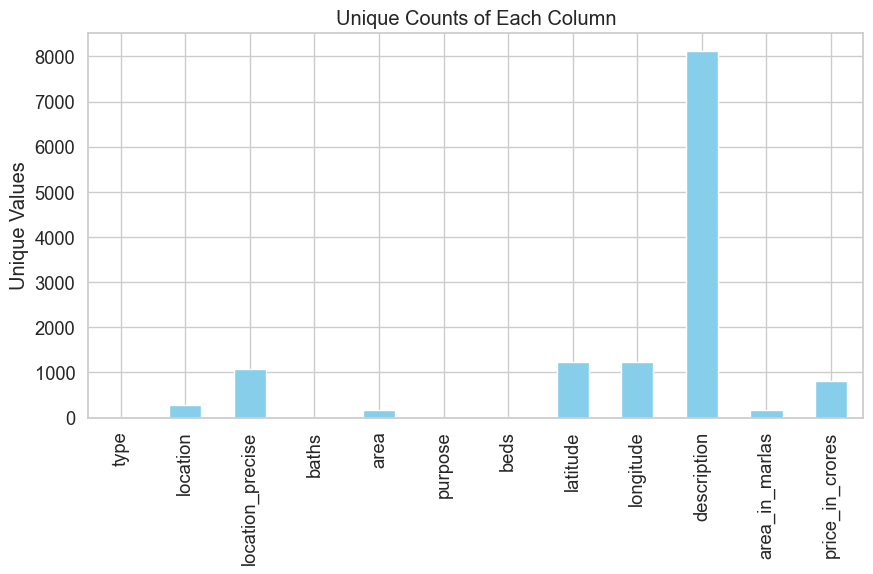

In [15]:
unique_counts = df_cleaned.nunique()
unique_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Unique Counts of Each Column")
plt.ylabel("Unique Values")
plt.show()

In [16]:

df_cleaned.head()


type     location                                 location_precise  baths  \
0  House  DHA Defence  DHA Phase 6 - Block K, DHA Phase 6, DHA Defence    6.0   
1  House  DHA Defence                         DHA Phase 7, DHA Defence    6.0   
2  House  EME Society               EME Society - Block C, EME Society    6.0   
3  House  DHA Defence                         DHA Phase 5, DHA Defence    7.0   
4  House  DHA Defence                         DHA Phase 7, DHA Defence    6.0   

      area purpose  beds   latitude  longitude  \
0  1 Kanal    Sale   6.0  31.468862  74.463358   
1  2 Kanal    Sale   5.0  31.484893  74.472342   
2  1 Kanal    Sale   5.0  31.427857  74.213576   
3  1 Kanal    Sale   5.0  31.462493  74.409342   
4  1 Kanal    Sale   5.0  31.484893  74.472342   

                                         description  area_in_marlas  \
0  SYED BROTHERS OFFERS:100% Original Pictures Ar...            20.0   
1  Khalifa Real Estate & Builders (R) Offers20-Ma...            40.0   
2  Near the parkNear the MasjidNear the commercia...            20.0   
3  AA REAL ESTATE Offer Profitable1 Kanal Modern ...            20.0   
4  About The Property:- 05 Master Size Bed Rooms ...            20.0   

   price_in_crores  
0            25.00  
1            11.25  
2            10.95  
3             6.87  
4             7.45

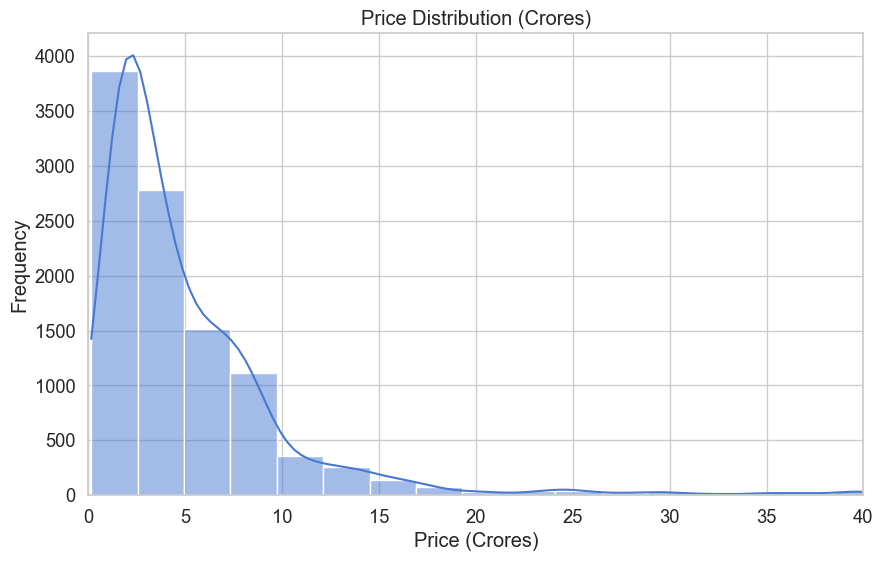

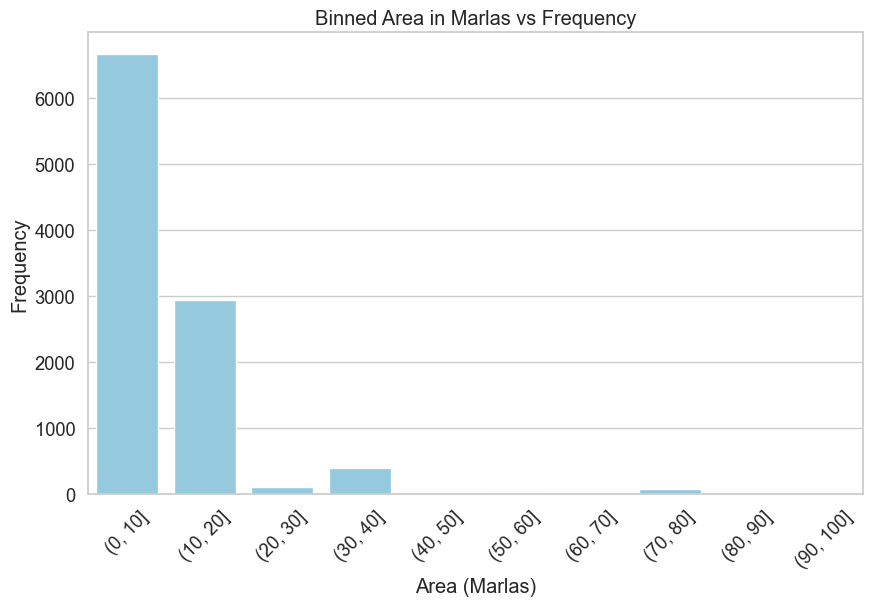

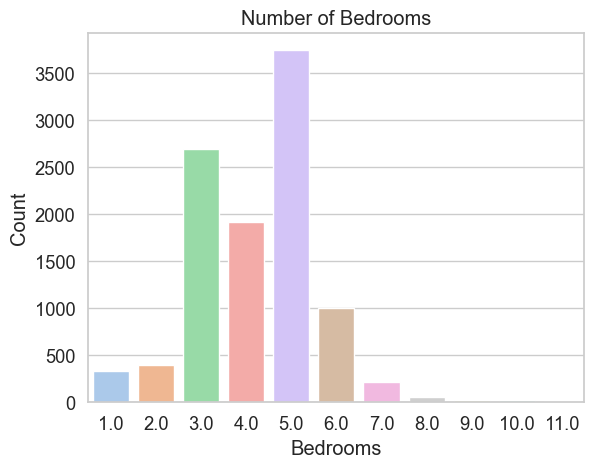

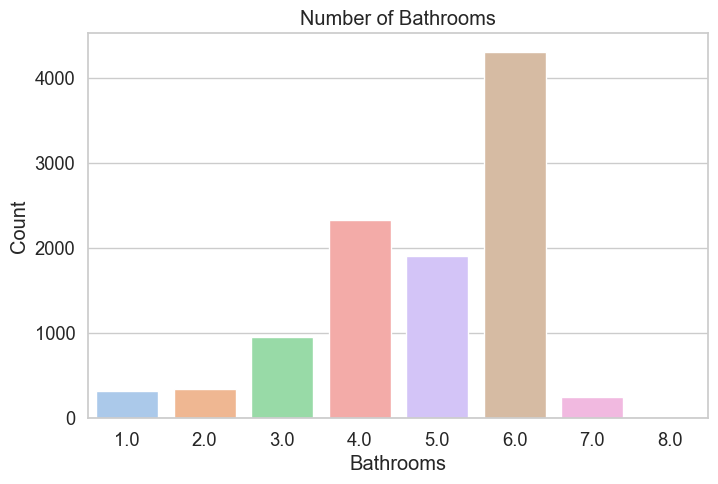

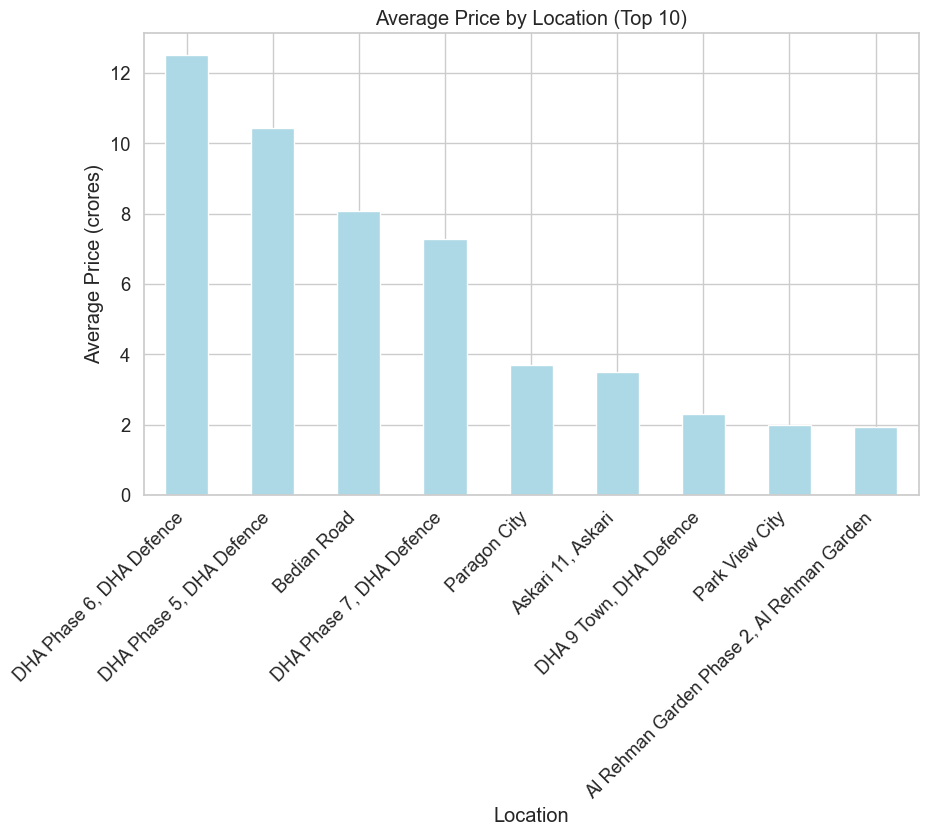

In [17]:
# Price Distribution with Custom X-Axis Range
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['price_in_crores'], bins=30, kde=True)
plt.title('Price Distribution (Crores)')
plt.xlabel('Price (Crores)')
plt.ylabel('Frequency')
plt.xlim(0, 40)  # Adjust the range as needed
plt.show()

df_filtered = df_cleaned[df_cleaned['area_in_marlas'] > 0]
df_filtered['area_bin'] = pd.cut(df_filtered['area_in_marlas'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
area_counts = df_filtered['area_bin'].value_counts().sort_index().reset_index()
area_counts.columns = ['area_bin', 'frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x='area_bin', y='frequency', data=area_counts, color='skyblue')
plt.title('Binned Area in Marlas vs Frequency')
plt.xlabel('Area (Marlas)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Beds Distribution
sns.countplot(x='beds', data=df_cleaned, palette='pastel')  # Change color here
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

# Baths Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='baths', data=df_cleaned, palette='pastel')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

# Average price by location
filtered_locations = df_cleaned.groupby('location_precise').filter(lambda x: len(x) >= 100)
avg_price_by_location = filtered_locations.groupby('location_precise')['price_in_crores'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_price_by_location.plot(kind='bar', color='lightblue')
plt.title("Average Price by Location (Top 10)")
plt.xlabel("Location")
plt.ylabel("Average Price (crores)")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

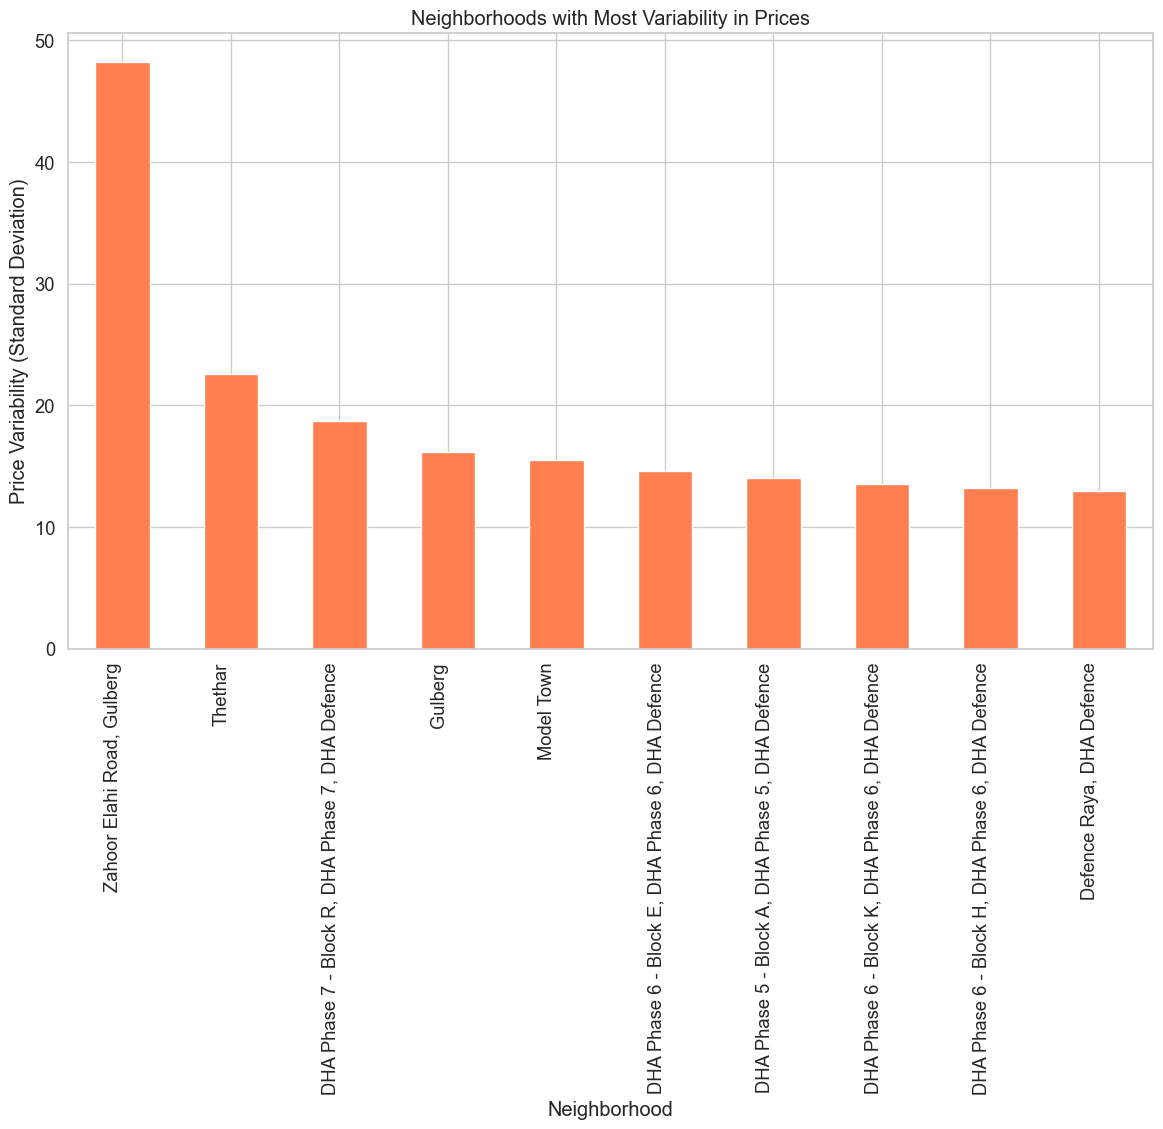

In [27]:
price_variance_by_location = df_cleaned.groupby("location_precise")["price_in_crores"].std().sort_values(ascending=False)
# print(price_variance_by_location.head(10))  # Top 10 volatile neighborhoods
# Plot neighborhoods with most variability in prices
top_variance_locations = price_variance_by_location.head(10)

plt.figure(figsize=(14, 8))
top_variance_locations.plot(kind="bar", color="coral")
plt.title("Neighborhoods with Most Variability in Prices")
plt.xlabel("Neighborhood")
plt.ylabel("Price Variability (Standard Deviation)")
plt.xticks(rotation=90, ha="right")
plt.show()


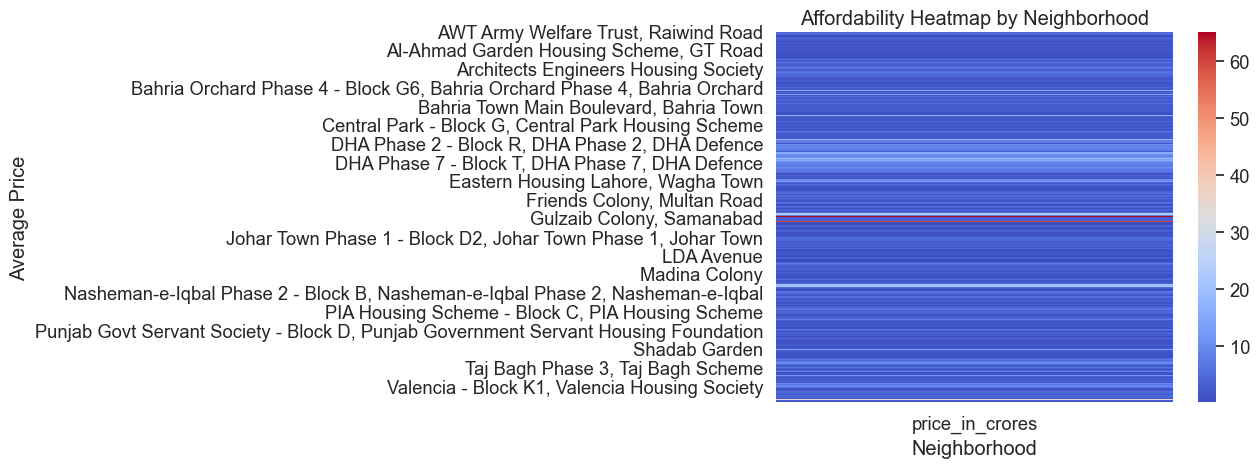

In [43]:
# Average price and availability by area bin
area_price_summary = df_filtered.groupby("area_bin").agg(
    avg_price=("price_in_crores", "mean"),
    count=("price_in_crores", "count")
).reset_index()


# Neighborhood affordability heatmap
neighborhood_affordability = df_cleaned.pivot_table(index="location_precise", values="price_in_crores", aggfunc="mean")
sns.heatmap(neighborhood_affordability, cmap="coolwarm", annot=False)
plt.title("Affordability Heatmap by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.show()

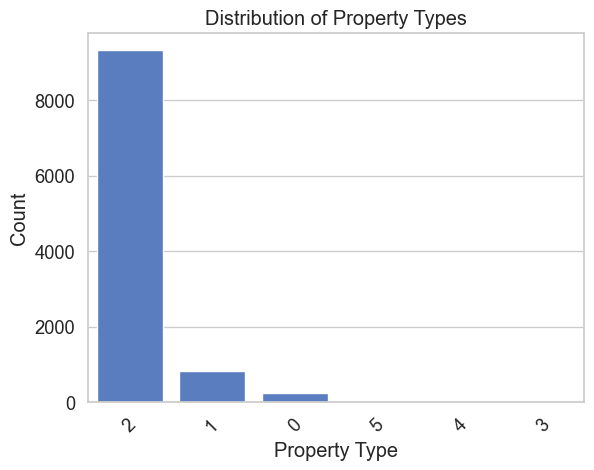

In [28]:
sns.countplot(data=df_cleaned, x="type", order=df_cleaned["type"].value_counts().index)
plt.title("Distribution of Property Types")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

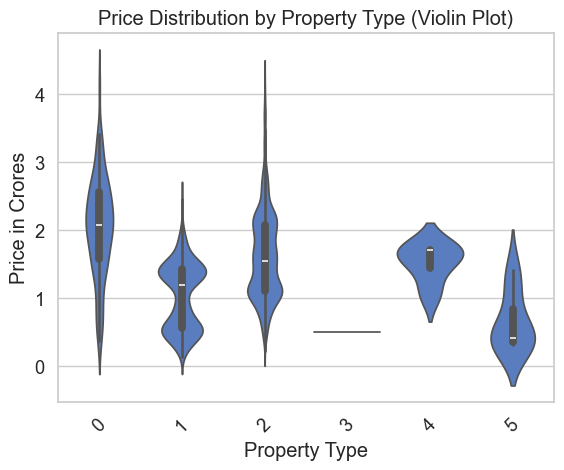

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=df_cleaned, x="type", y=np.log1p(df_cleaned["price_in_crores"]))
plt.title("Price Distribution by Property Type (Violin Plot)")
plt.xlabel("Property Type")
plt.ylabel("Price in Crores")
plt.xticks(rotation=45)
plt.show()

#### Explore Price Distribution Across Different Regions

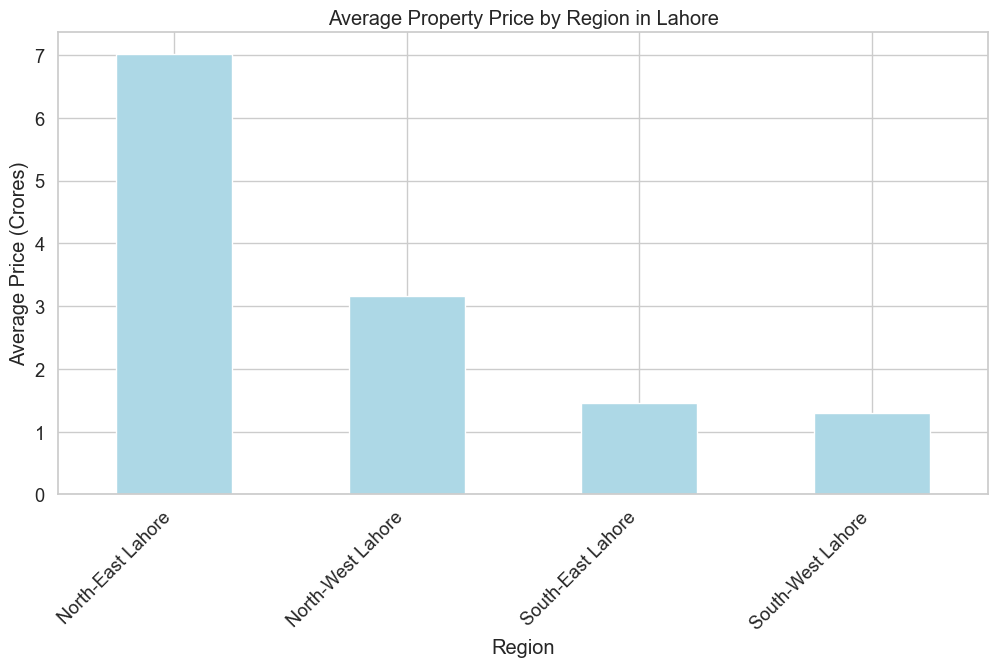

In [52]:
# Adjusted thresholds for latitude and longitude based on the given data range
def categorize_region(row):
    if row['latitude'] > 31.3 and row['longitude'] > 74.3:
        return 'North-East Lahore'
    elif row['latitude'] > 31.3 and row['longitude'] < 74.3:
        return 'North-West Lahore'
    elif row['latitude'] < 31.3 and row['longitude'] > 74.3:
        return 'South-East Lahore'
    elif row['latitude'] < 31.3 and row['longitude'] < 74.3:
        return 'South-West Lahore'
    else:
        return 'Other'

# Apply the categorization function to the dataframe
df_cleaned['region'] = df_cleaned.apply(categorize_region, axis=1)

# Calculate the average price in each region
avg_price_by_region = df_cleaned.groupby('region')['price_in_crores'].mean().sort_values(ascending=False)

# Plot the average price by region
plt.figure(figsize=(12, 6))
avg_price_by_region.plot(kind='bar', color='lightblue')
plt.title('Average Property Price by Region in Lahore')
plt.xlabel('Region')
plt.ylabel('Average Price (Crores)')
plt.xticks(rotation=45, ha='right')
plt.show()



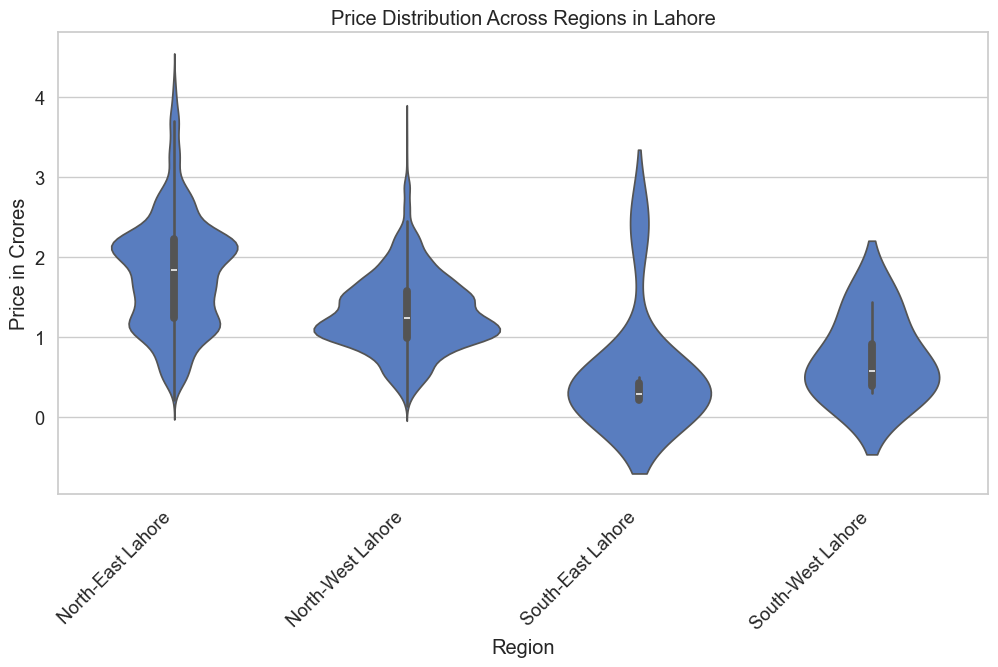

In [53]:

# Violin plot to compare price distribution across regions
plt.figure(figsize=(12, 6))
sns.violinplot(x='region', y=np.log1p(df_cleaned["price_in_crores"]), data=df_cleaned)

# Title and labels
plt.title('Price Distribution Across Regions in Lahore')
plt.xlabel('Region')
plt.ylabel('Price in Crores')
plt.xticks(rotation=45, ha='right')

plt.show()

region
North-East Lahore    7.672210
South-East Lahore    3.298399
North-West Lahore    2.605146
South-West Lahore    1.308201
Name: price_in_crores, dtype: float64


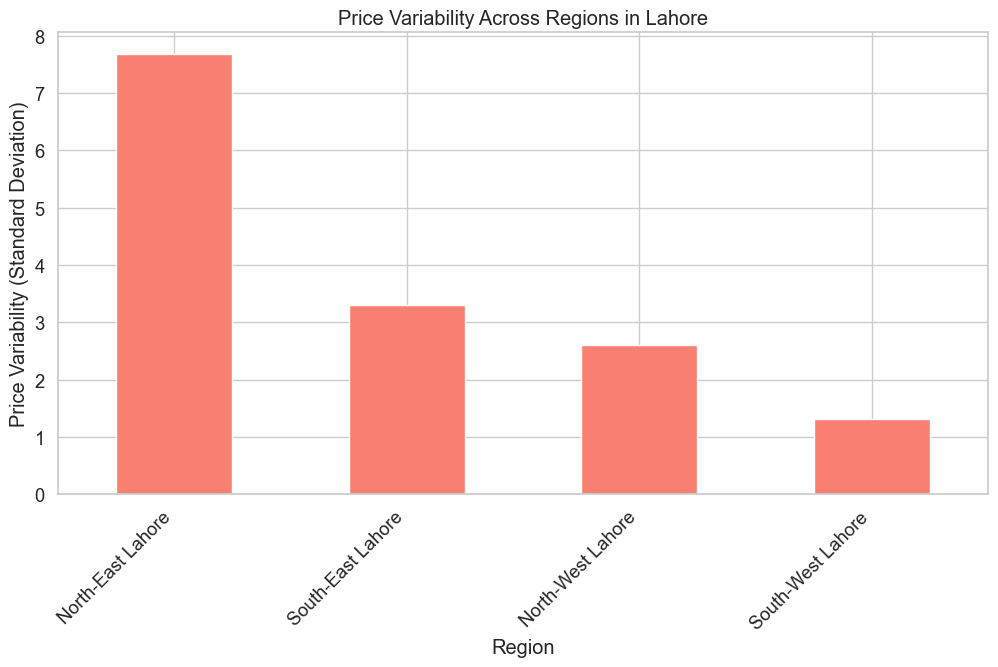

In [54]:
# Calculate price variability (standard deviation) by region
price_variability_by_region = df_cleaned.groupby('region')['price_in_crores'].std().sort_values(ascending=False)

# Display the regions with the highest price variability
print(price_variability_by_region)

# Optionally, plot the price variability
plt.figure(figsize=(12, 6))
price_variability_by_region.plot(kind='bar', color='salmon')
plt.title('Price Variability Across Regions in Lahore')
plt.xlabel('Region')
plt.ylabel('Price Variability (Standard Deviation)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Text Analysis of Descriptions

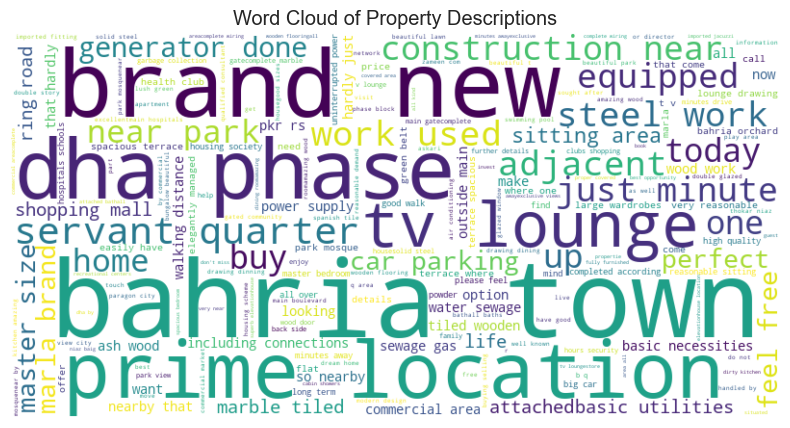

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define stopwords and make them case-insensitive
stopwords = set([
    "house", "bath", "room", "located", "for", "in", "of", "the", "sale", 
    "you", "u", "can", "with", "is", "are", "this", "and", "a", "to", "it",
    "we", "on", "at", "your", "from", "our", "property", "real", "estate", 
    "available", "contact", "us","lahore", "bed", "rooms","more","detail","will","be","if"
])
stopwords = set(word.lower() for word in stopwords)

# Combine all descriptions into a single string, converting to lowercase for case insensitivity
text = " ".join(df_cleaned["description"].dropna().str.lower())

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Property Descriptions")
plt.show()

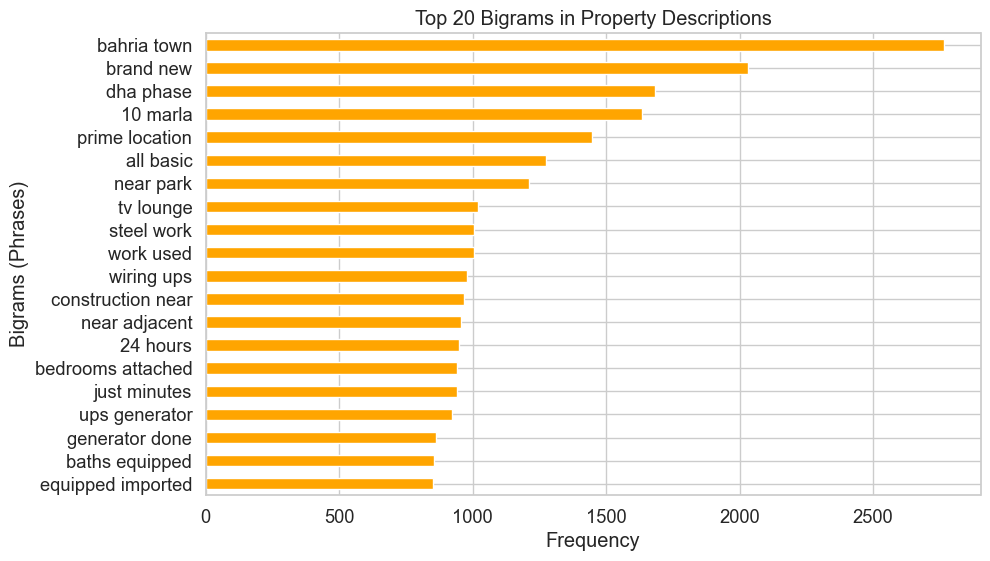

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text to find bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=list(stopwords))
X = vectorizer.fit_transform(df_cleaned["description"].dropna().str.lower())

# Get the most frequent bigrams
bigram_counts = pd.DataFrame(
    X.sum(axis=0).T,
    index=vectorizer.get_feature_names_out(),
    columns=["Frequency"]
).sort_values("Frequency", ascending=False).head(20)

# Plot bar chart for bigrams
bigram_counts.plot(kind="barh", figsize=(10, 6), legend=False, color="orange")
plt.xlabel("Frequency")
plt.ylabel("Bigrams (Phrases)")
plt.title("Top 20 Bigrams in Property Descriptions")
plt.gca().invert_yaxis()
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
stopwords = [
    "house", "bath", "room", "located", "for", "in", "of", "the", "sale", 
    "you", "u", "can", "with", "is", "are", "this", "and", "a", "to", "it",
    "we", "on", "at", "your", "from", "our", "property", "real", "estate", 
    "available", "contact", "us", "lahore", "bed", "rooms", "more", "detail"
]
# Convert descriptions to TF-IDF matrix
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_cleaned["description"].dropna().str.lower())

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Print top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_words = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

Topic 1: used near terrace rooms wood baths area kitchen bungalow imported
Topic 2: security city 24 modern features amenities living lahore town bahria
Topic 3: kitchen attached room car brand new tv sale marla house
Topic 4: investment today make comes price rs best room house property
Topic 5: walking mosque house drive minutes near distance school park road


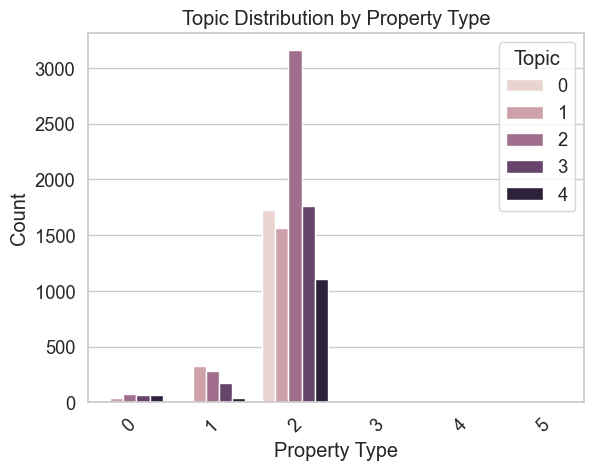

In [34]:
# Transform descriptions into topic probabilities
topic_matrix = lda.transform(tfidf_matrix)

# Assign the dominant topic to each property
df_cleaned["dominant_topic"] = topic_matrix.argmax(axis=1)
# print(df_cleaned[["description", "dominant_topic"]].head())
sns.countplot(data=df_cleaned, x="type", hue="dominant_topic")
plt.title("Topic Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.legend(title="Topic")
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

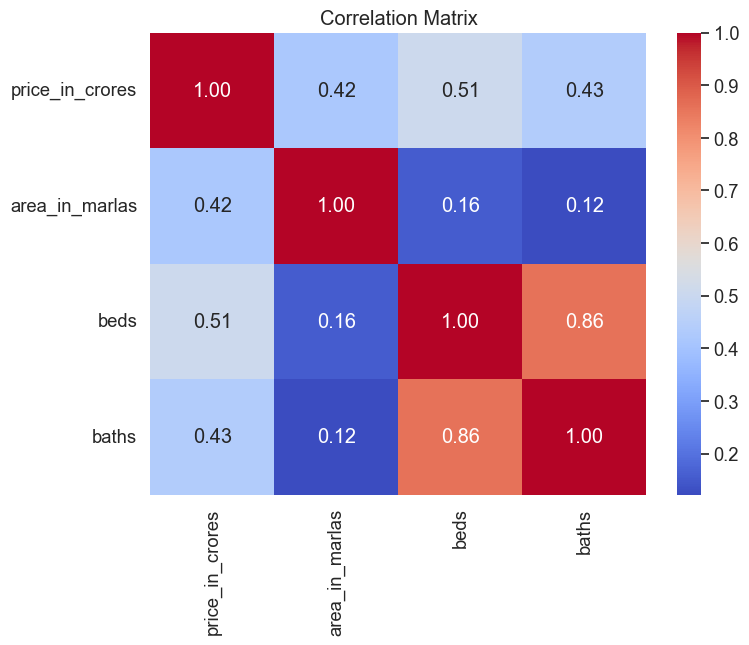

In [18]:
# correlation matrix -- heatmap
plt.figure(figsize=(8,6))
corr_matrix = df_cleaned[['price_in_crores', 'area_in_marlas', 'beds', 'baths']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Scatter and Box Plots

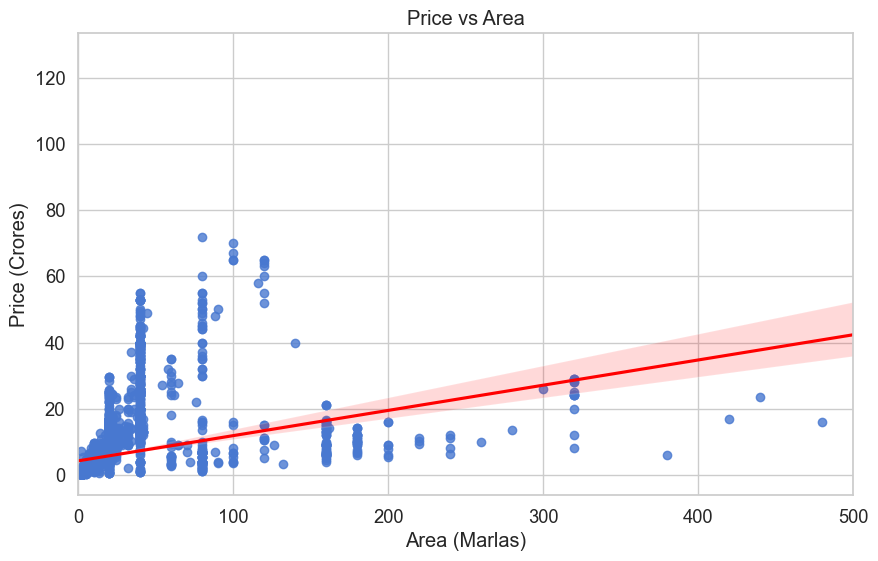

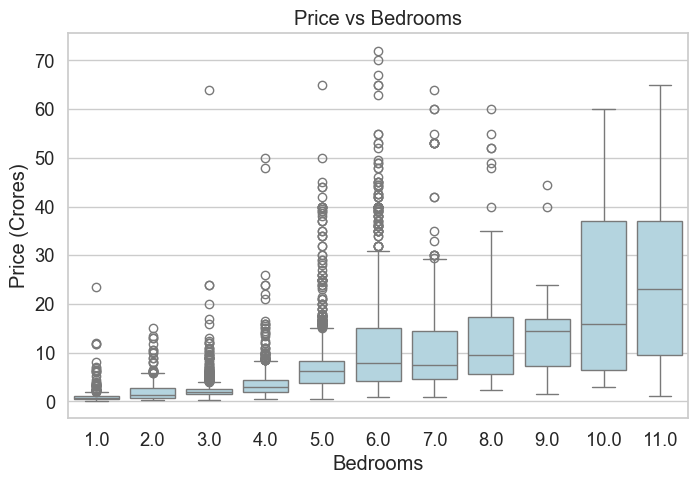

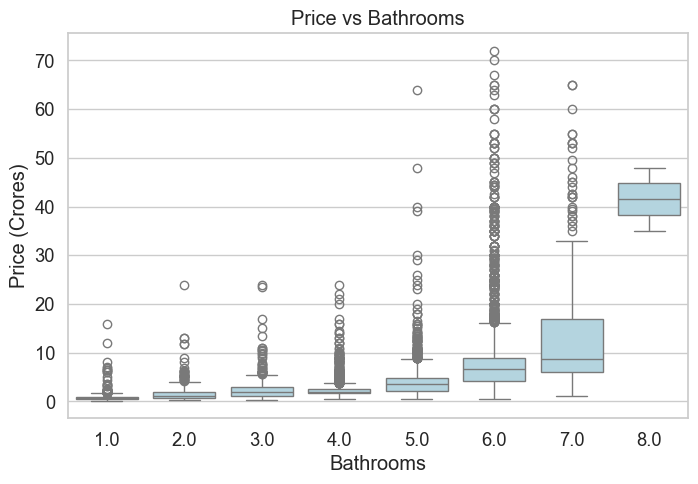

In [19]:
# Price vs Area with Line of Best Fit
plt.figure(figsize=(10, 6))
sns.regplot(x='area_in_marlas', y='price_in_crores', data=df_cleaned, scatter=True, line_kws={'color': 'red'})
plt.title('Price vs Area')
plt.xlabel('Area (Marlas)')
plt.ylabel('Price (Crores)')
plt.xlim(0, 500)
plt.show()

# Price vs Bedrooms
plt.figure(figsize=(8,5))
sns.boxplot(x='beds', y='price_in_crores', data=df_cleaned, color='lightblue')
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (Crores)')
plt.show()

# Price vs Bathrooms
plt.figure(figsize=(8,5))
sns.boxplot(x='baths', y='price_in_crores', data=df_cleaned, color='lightblue')
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price (Crores)')
plt.show()

#### Pricewise Categorizations 

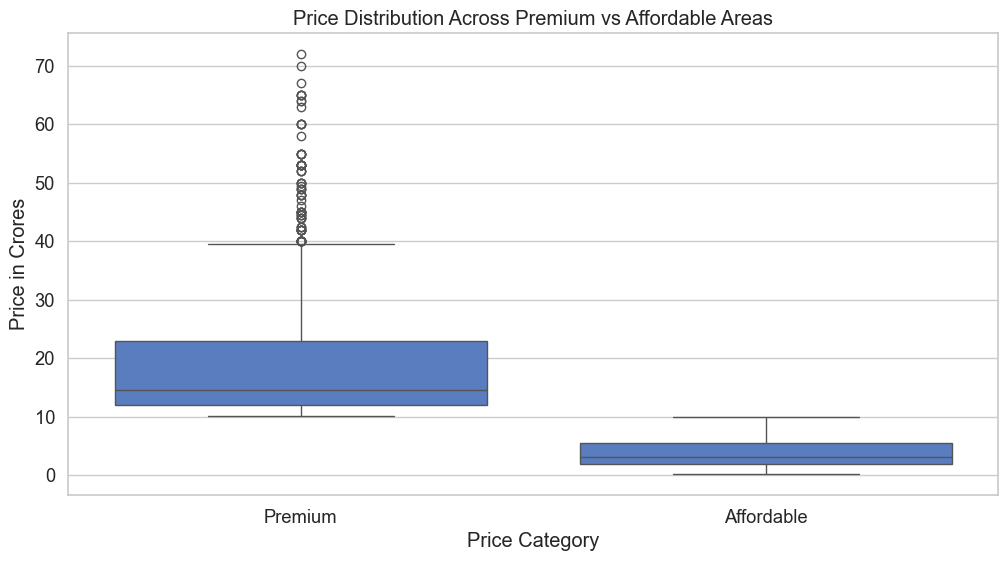

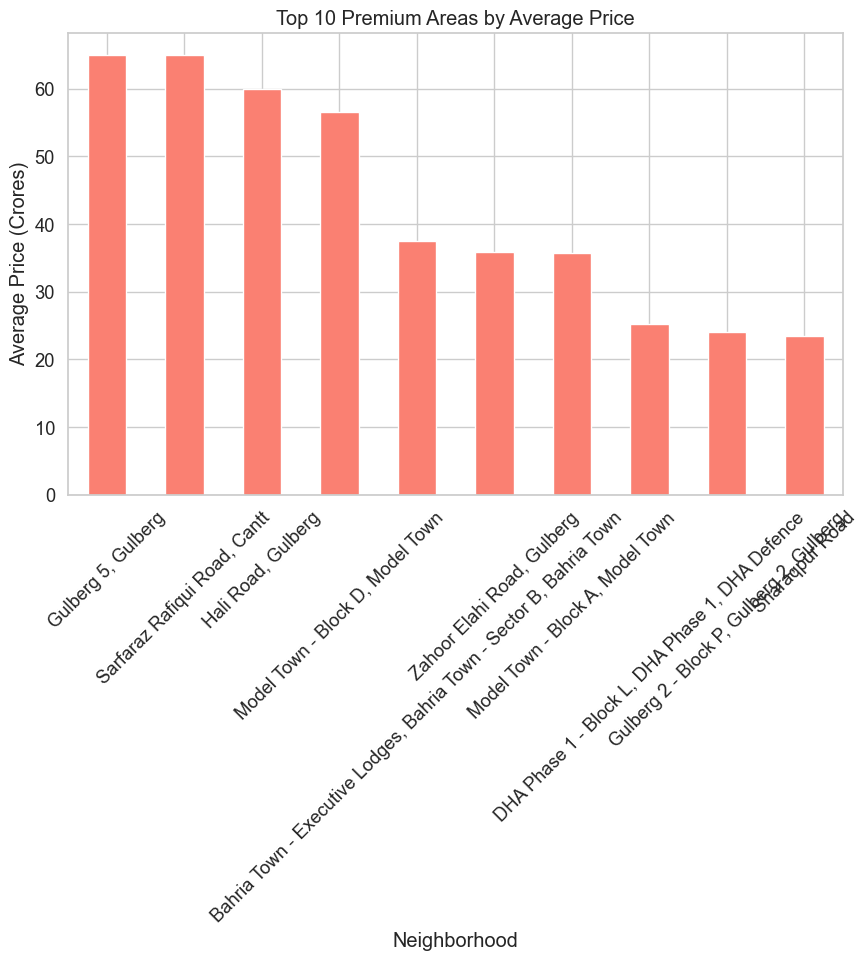

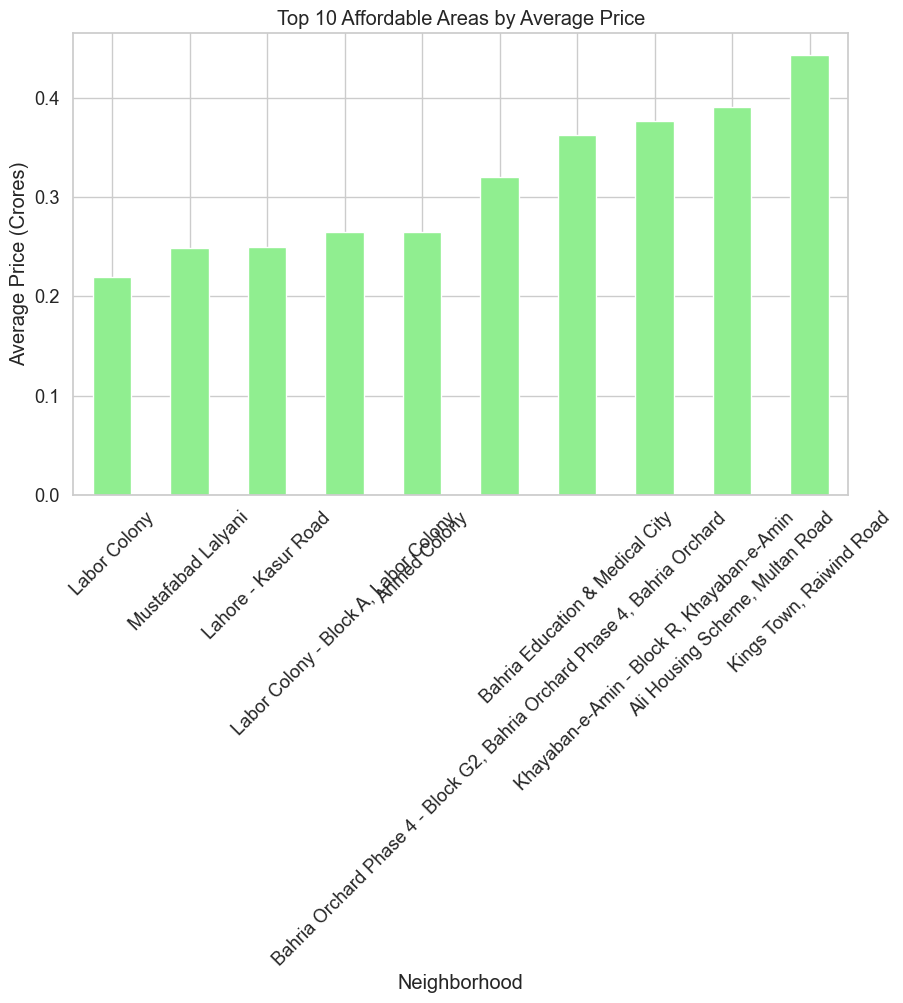

In [67]:
# Categorize regions based on price
def categorize_price(price):
    if price > 10:  # Assuming 10 Crores is the threshold for a premium area
        return 'Premium'
    else:
        return 'Affordable'

# Apply categorization
df_cleaned['price_category'] = df_cleaned['price_in_crores'].apply(categorize_price)

# Boxplot to compare price distribution across regions categorized by Premium and Affordable
plt.figure(figsize=(12, 6))
sns.boxplot(x='price_category', y='price_in_crores', data=df_cleaned)
plt.title('Price Distribution Across Premium vs Affordable Areas')
plt.xlabel('Price Category')
plt.ylabel('Price in Crores')
plt.show()
# Group by location and calculate average price
avg_price_by_location = df_cleaned.groupby('location_precise')['price_in_crores'].mean()

# Sort and get top 10 premium areas
top_premium_locations = avg_price_by_location.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_premium_locations.plot(kind='bar', color='salmon')
plt.title("Top 10 Premium Areas by Average Price")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price (Crores)")
plt.xticks(rotation=45)
plt.show()

# Get bottom 10 affordable areas by average price
bottom_affordable_locations = avg_price_by_location.sort_values().head(10)

# Plot
plt.figure(figsize=(10, 6))
bottom_affordable_locations.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Affordable Areas by Average Price")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price (Crores)")
plt.xticks(rotation=45)
plt.show()

#### Effect on property prices as the distance from DHA (one of the expensive neighborhoods in Lahore) increases

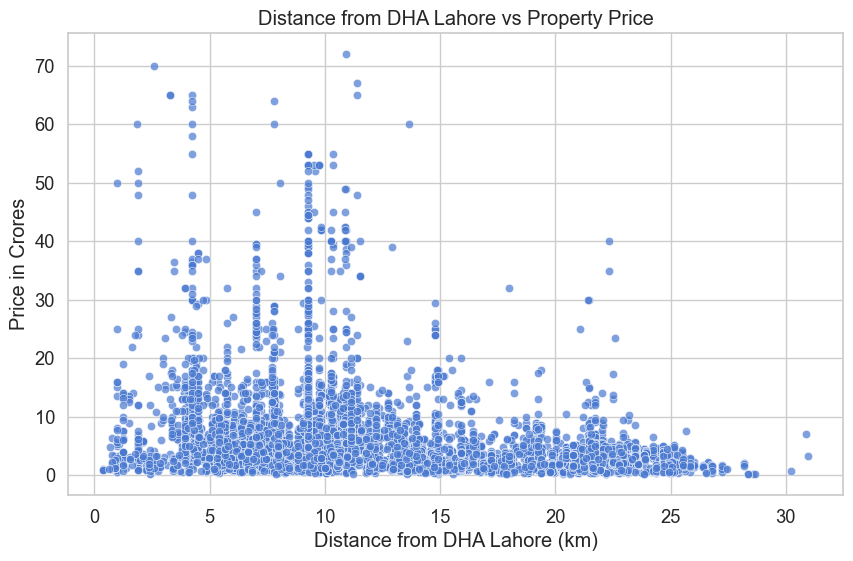

In [68]:
from geopy.distance import geodesic
import seaborn as sns
import matplotlib.pyplot as plt

# Define DHA Lahore coordinates (new city center)
dha_location = (31.5080, 74.3581)

# Compute distance of each location from DHA
df_cleaned['distance_from_dha'] = df_cleaned.apply(
    lambda row: geodesic(dha_location, (row['latitude'], row['longitude'])).km, axis=1
)

# Remove any outliers (if necessary)
df_cleaned = df_cleaned[df_cleaned['distance_from_dha'] < 500]  # Remove points farther than 100 km (or set an appropriate range)

# Scatter plot showing the relationship between distance from DHA and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_dha', y='price_in_crores', data=df_cleaned, alpha=0.7)
plt.title('Distance from DHA Lahore vs Property Price')
plt.xlabel('Distance from DHA Lahore (km)')
plt.ylabel('Price in Crores')
plt.show()

#  Creating a heatmap centered around Lahore, representing property prices in crores.

In [20]:
!pip install folium


In [21]:
import folium
from folium.plugins import HeatMap
from IPython.display import display


df_cleaned = df_cleaned.dropna(subset=['latitude', 'longitude', 'price_in_crores'])
df_cleaned['price_in_crores'] = pd.to_numeric(df_cleaned['price_in_crores'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['price_in_crores'])

heat_data = [
    [row['latitude'], row['longitude'], row['price_in_crores']]
    for index, row in df_cleaned.iterrows()
]
m = folium.Map(location=[31.5204, 74.3587], zoom_start=10)
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)
from IPython.display import display
display(m)


In [22]:
avg_prices = df_cleaned.groupby(['latitude', 'longitude'])['price_in_crores'].mean().reset_index()

heat_data = [
    [row['latitude'], row['longitude'], row['price_in_crores']]
    for index, row in avg_prices.iterrows()
]
m = folium.Map(location=[31.5204, 74.3587], zoom_start=10)
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)
from IPython.display import display
display(m)

# Research Question 1: What factors significantly influence property prices in Lahore?

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['type'] = le.fit_transform(df_cleaned['type'])
df_cleaned['location'] = le.fit_transform(df_cleaned['location'])

In [24]:
from sklearn.model_selection import train_test_split

df_cleaned['beds+baths'] = df_cleaned['baths'] + df_cleaned['beds']

X = df_cleaned.drop(columns=['price_in_crores'])  # Features

y = df_cleaned['price_in_crores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop(columns=['latitude', 'longitude'])
X_test = X_test.drop(columns=['latitude', 'longitude'])


X_train = X_train.drop(columns=['baths', 'beds','location_precise','area'])
X_test = X_test.drop(columns=['baths', 'beds','location_precise','area'])


In [25]:
# #dropping irrelevant columns
X_train = X_train.drop(columns=['description'])
X_test = X_test.drop(columns=['description'])
X_train = X_train.drop(columns=['purpose'])
X_test = X_test.drop(columns=['purpose'])

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert datasets to DMatrix
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

# Model parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "max_depth": 4,
    "learning_rate": 0.2,
    "n_estimators": 100,
}

# Training the model
model = xgb.train(params, train_dmatrix, num_boost_round=200)

# Predictions
preds = model.predict(test_dmatrix)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Calculating the Mean Absolute Percentage Error for chceking the accuracy of out model

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, preds)

print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 0.2147737085065766


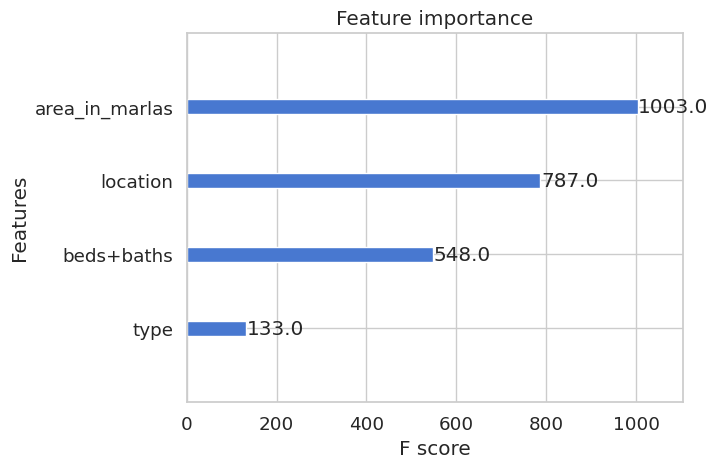

Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}


In [ ]:
# Feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor()

params_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}") ## trained my model using these parameters

The plot above illustrates the feature importance scores obtained from the trained XGBoost model. Feature importance represents how much each variable contributes to the predictive power of the model. The higher the score, the more significant the feature in influencing property prices.

The analysis indicates that property size and location are the primary drivers of property prices in Lahore.These findings suggest that buyers, and sellers should focus on these factors when evaluating or setting property values. Other features, such as the total number of beds and baths and property type may affect price but to a lesser degree.

# Research Question 2: How do property vary across different neighbourhood?

In [38]:
df = pd.read_csv("cleaned_properties.csv")

In [39]:

# Remove invalid rows
df = df.dropna(subset=['price_in_crores', 'area_in_marlas', 'location'])

# Calculating price per marla
df['price_per_marla'] = df['price_in_crores'] * 100 / df['area_in_marlas']

# Remove rows with infinite or NaN values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Aggregating Data by Location
location_summary = df.groupby('location').agg({
    'price_per_marla': 'mean',
    'area_in_marlas': 'mean',
    'price_in_crores': 'mean',
    'type': 'count',
    'beds': 'mean',
    'baths': 'mean'
}).rename(columns={'type': 'listing_count'})

location_summary.reset_index(inplace=True)

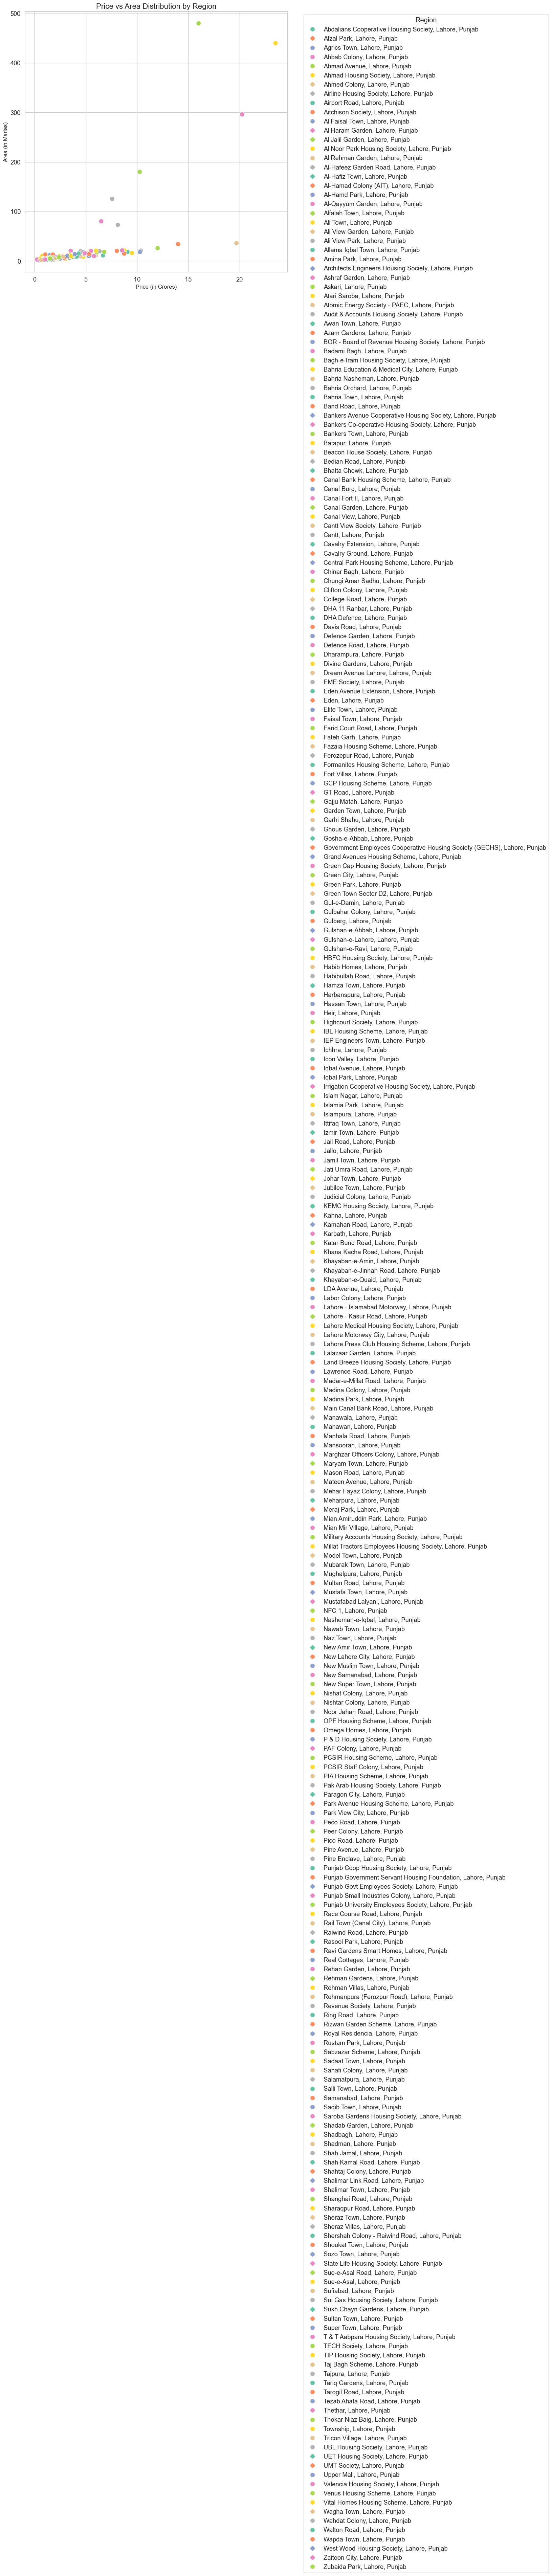

In [40]:

plt.figure(figsize=(10, 10))
sns.scatterplot(data=location_summary, x='price_in_crores', y='area_in_marlas', hue='location', palette='Set2', s=100)
plt.title('Price vs Area Distribution by Region', fontsize=16)
plt.xlabel('Price (in Crores)', fontsize=12)
plt.ylabel('Area (in Marlas)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moving legend outside
plt.grid(True)
plt.show()

#### Hypothesis
- **H0 (Null Hypothesis):** There is no significant difference in property prices between neighborhoods in different regions in Lahore.
- **H1 (Alternative Hypothesis):** There is a significant difference in property prices between neighborhoods in different regions in Lahore, with certain regions (e.g., North-East Lahore) exhibiting higher property prices.
#### Approach
We use **Causal Inference** methods, specifically **Propensity Score Matching (PSM)**, to estimate the effect of region on property prices while controlling for confounding variables like property size, number of bedrooms, and number of bathrooms

In [88]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.linear_model import LogisticRegression 
from scipy.stats import ttest_ind
from sklearn.neighbors import NearestNeighbors
# Check how the regions are distributed
df_cleaned['region'].value_counts()
# Filter out regions with less than a threshold number of data points (for example, < 50)
df_cleaned = df_cleaned[df_cleaned['region'].isin(['North-East Lahore', 'North-West Lahore'])]

# Check the distribution of regions after filtering
# print(df_cleaned['region'].value_counts())

# Define treatment (1 for North-East Lahore, 0 for North-West Lahore)
df_cleaned['treatment'] = (df_cleaned['region'] == 'North-East Lahore').astype(int)

# Features used to estimate propensity scores
features = ['area_in_marlas', 'beds', 'baths']

# Scale the features
scaler = StandardScaler()
df_cleaned[features] = scaler.fit_transform(df_cleaned[features])

# Logistic Regression to estimate the propensity score
X = df_cleaned[features]
y = df_cleaned['treatment']

log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict the propensity scores
df_cleaned['propensity_score'] = log_reg.predict_proba(X)[:, 1]

# Split data into treated (North-East) and control (North-West) groups
treated = df_cleaned[df_cleaned['treatment'] == 1]
control = df_cleaned[df_cleaned['treatment'] == 0]

# Nearest Neighbor Matching based on propensity score
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])

# Find the nearest neighbor for each treated property
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Get the matched control properties
matched_control = control.iloc[indices.flatten()]

# Combine treated and matched control properties
matched_data = pd.concat([treated, matched_control])
# Calculate ATE (difference in average prices)
ate = matched_data[matched_data['treatment'] == 1]['price_in_crores'].mean() - matched_data[matched_data['treatment'] == 0]['price_in_crores'].mean()
print(f"Average Treatment Effect (ATE): {ate} Crores")


# Perform t-test to compare price distributions between matched regions
north_east_prices = matched_data[matched_data['treatment'] == 1]['price_in_crores']
north_west_prices = matched_data[matched_data['treatment'] == 0]['price_in_crores']

t_stat, p_value = ttest_ind(north_east_prices, north_west_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion based on p-value
if p_value < 0.05:
    print("There is a statistically significant difference in property prices between North-East and North-West Lahore.")
else:
    print("There is no significant difference in property prices between North-East and North-West Lahore.")




Average Treatment Effect (ATE): -0.29325468853545367 Crores
T-statistic: -2.2114186665789624
P-value: 0.027025526279607706
There is a statistically significant difference in property prices between North-East and North-West Lahore.


Average Treatment Effect (ATE): The negative ATE value (-0.30 crores) suggests that properties in North-East Lahore are, on average, 0.30 crores more expensive than their matched counterparts in North-West Lahore.

T-statistic and P-value: The t-statistic of -2.25 and a p-value of 0.024 (less than 0.05) mean that the difference in property prices between North-East and North-West Lahore is statistically significant. This supports the conclusion that the observed price difference is not likely due to random chance.

Implications for the Hypothesis:

Affordability Insight: North-East Lahore appears to have higher property prices compared to North-West Lahore, making it a more premium region.
This significant difference in prices may be linked to factors such as proximity to key amenities, infrastructure quality, or socioeconomic dynamics in North-East Lahore.

# Research Question 3: What regions in Lahore offer the best opportunities for buyers and sellers?

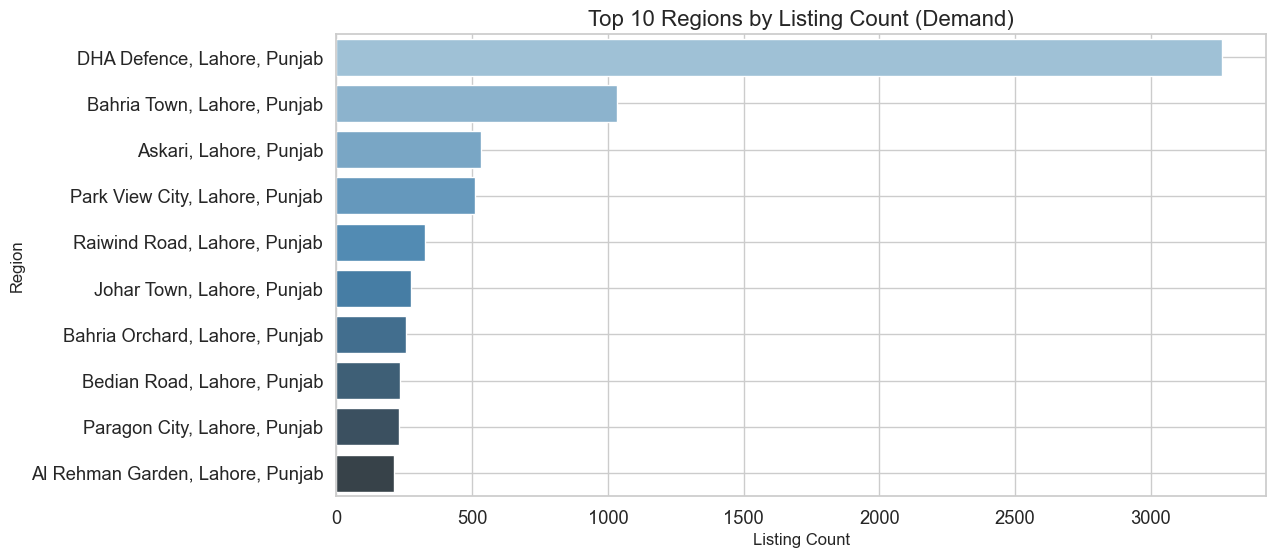

In [85]:
# 1. Top 10 Regions by Listing Count (High Demand)
top_regions_by_demand = location_summary.sort_values(by='listing_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='listing_count', y='location', data=top_regions_by_demand, palette='Blues_d')
plt.title('Top 10 Regions by Listing Count (Demand)', fontsize=16)
plt.xlabel('Listing Count', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(True)
plt.show()


This analysis identifies the top 10 regions in Lahore with the highest listing counts, indicating areas with the greatest demand in the real estate market.
Findings show that DHA Defence and Bahria Town are the regions with a strong market activity and high demand for properties.

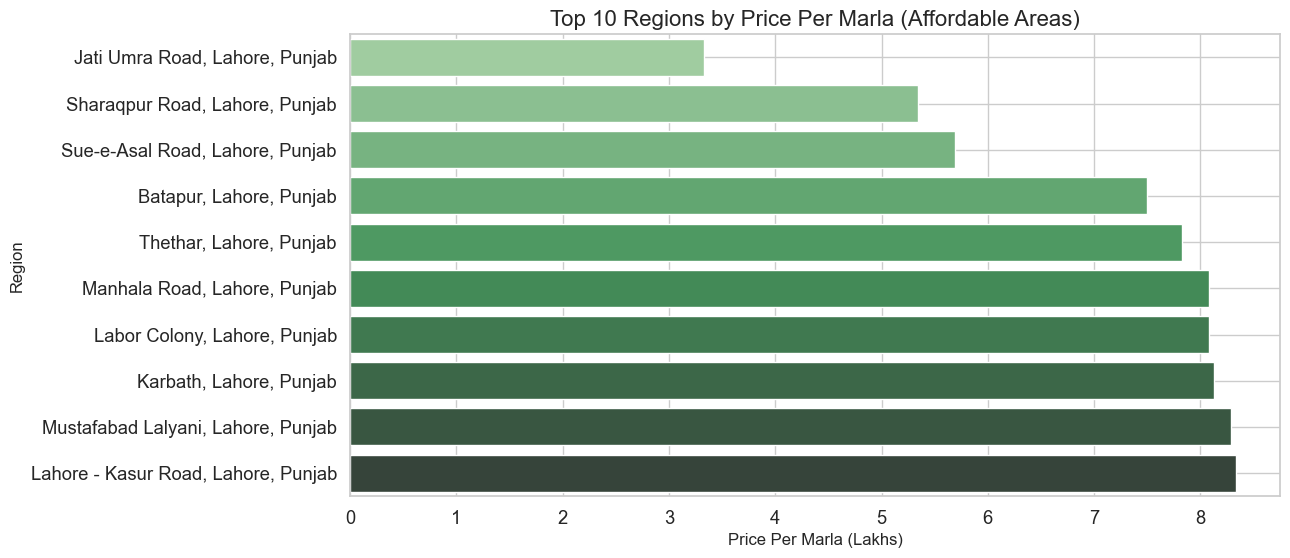

In [86]:
# 2. Top 10 Regions by Price Per Marla (Affordable Areas)
top_regions_by_price = location_summary.sort_values(by='price_per_marla', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='price_per_marla', y='location', data=top_regions_by_price, palette='Greens_d')
plt.title('Top 10 Regions by Price Per Marla (Affordable Areas)', fontsize=16)
plt.xlabel('Price Per Marla (Lakhs)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(True)
plt.show()

This analysis identifies the top 10 most affordable regions in Lahore based on the price per marla (land unit). These areas are particularly attractive to buyers seeking cost-effective options.Jati Umra Road and Sharqpur Road are the most affordable regions, with the lowest price per marla, making them ideal for budget-conscious buyers .

Overall, both the plots suggest that areas like DHA Defence and Bahria Town are optimal for sellers looking to capitalize on high demand, while regions such as Jati Umra Road and Sharqpur Road are ideal for buyers seeking affordability. These insights provide a comprehensive understanding of where buyers and sellers can find the most opportunities in Lahore's real estate market.